In [1]:
import pandas as pd

data = pd.read_csv("bh-annotation.csv",encoding='utf-8')

In [2]:
# Clean the routes without catch points
data = data[~(data["region_count"]==0)]

In [3]:
# Delete unused columns
data = data.drop("file_size",axis=1)
data = data.drop("file_attributes",axis=1)

In [4]:
# Calculate how many routes leave
n_routes = data["filename"].nunique()
print(n_routes)

15


In [7]:
import sys
sys.path.append("../src")

import route_parser as rp

routes = rp.hold_centers(data)

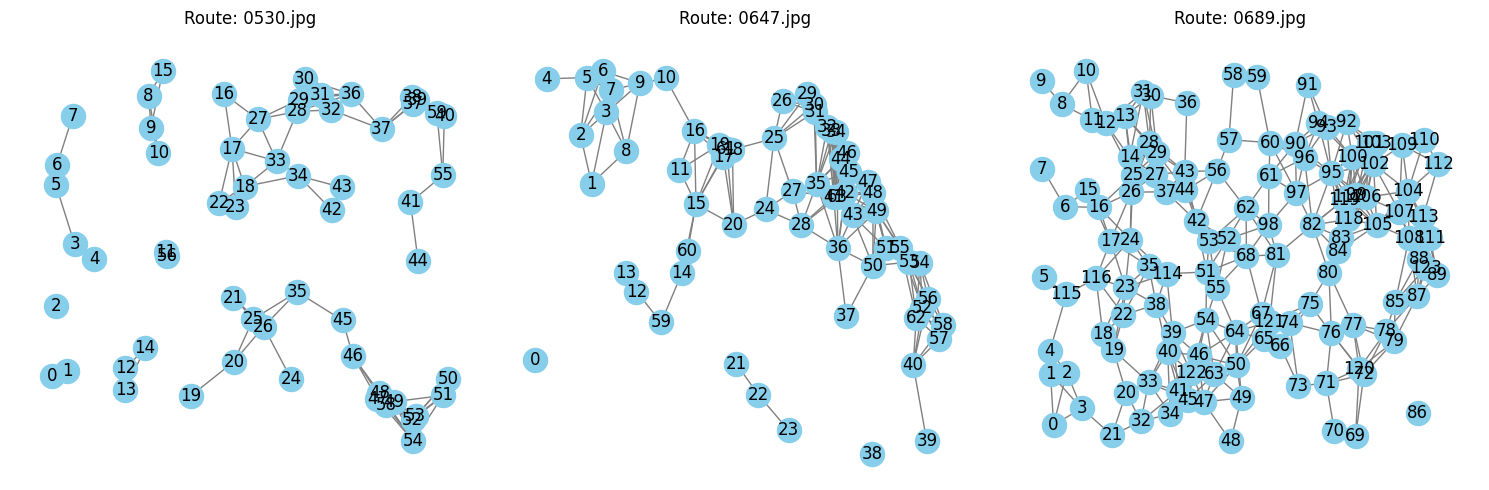

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (img, holds) in enumerate(list(routes.items())[10:13]):
    G = rp.build_route_graph(holds,300)
    pos = rp.nx.get_node_attributes(G, 'pos')
    rp.nx.draw(G, pos, ax=axs[i], with_labels=True, node_color='skyblue', edge_color='gray')
    axs[i].set_title(f"Route: {img}")
plt.tight_layout()
plt.show()

In [9]:
routes = pd.DataFrame(list(routes.items()),columns=["name","points"])

In [10]:
routes.to_csv("climbing_data.csv")